# Tensorflow

## Classification neural model 

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
tf.__version__

'2.6.0'

In [7]:
dataset = pd.read_excel("C:/Users/jatin/datasets_CSV/Churn_Modelling.xlsx")

In [8]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [10]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [11]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [13]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [16]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
ann = tf.keras.models.Sequential()

In [21]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [22]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [23]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [24]:
ann.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
ann.fit(X_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5140 - accuracy: 0.7806
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4430 - accuracy: 0.8084
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4225 - accuracy: 0.8231
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4118 - accuracy: 0.8264
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.8290
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3991 - accuracy: 0.8290
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3954 - accuracy: 0.8290
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3913 - accuracy: 0.8307
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8324
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3836 - accura

In [26]:
ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 5000]]))

array([[0.01677632]], dtype=float32)

In [28]:
ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 5000]]))>0.5

array([[False]])

In [47]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int)
y_pred.shape

(2000, 1)

In [51]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1524   71]
 [ 203  202]]


0.863

## Regression Neural Network

In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [66]:
tf.__version__

'2.6.0'

In [67]:
datasets = pd.read_excel("datasets_CSV/Folds5x2_pp.xlsx")

In [68]:
X = datasets.iloc[:, :-1].values
y = datasets.iloc[:, -1].values

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
ann = tf.keras.models.Sequential()

In [79]:
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

In [80]:
ann.add(tf.keras.layers.Dense(units=1))

In [81]:
ann.compile(optimizer="adam", loss = "mean_squared_error")

In [82]:
ann.fit(X_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 13584.0117
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 136.8146
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 127.2710
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 116.3515
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 104.5633
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 92.5234
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 80.9408
Epoch 8/100
240/240 [==============================] - 1s 3ms/step - loss: 70.2432
Epoch 9/100
240/240 [==============================] - 1s 3ms/step - loss: 61.0461
Epoch 10/100
240/240 [==============================] - 1s 3ms/step - loss: 53.2375
Epoch 11/100
240/240 [==============================] - 1s 3ms/step - loss: 47.1490
Epoch 12/100
240/240 [==============================] - 1s 2ms/step - loss: 42

In [83]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[432.72 431.23]
 [463.85 460.01]
 [467.37 461.14]
 ...
 [474.6  473.26]
 [441.29 438.  ]
 [460.55 463.28]]


## Convolutional Neural Network

In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [5]:
tf.__version__

'2.6.0'

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = train_datagen.flow_from_directory("datasets_CSV/dataset/training_set", target_size=(64, 64), batch_size=32, class_mode="binary")

Found 8000 images belonging to 2 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory("datasets_CSV/dataset/test_set", target_size=(64, 64), batch_size=32, class_mode="binary")

Found 2000 images belonging to 2 classes.


In [10]:
cnn = tf.keras.models.Sequential()

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [17]:
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [18]:
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
cnn.fit(x = training_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 170s 673ms/step - loss: 0.6674 - accuracy: 0.5830 - val_loss: 0.5968 - val_accuracy: 0.6915
Epoch 2/25
250/250 [==============================] - 69s 275ms/step - loss: 0.5982 - accuracy: 0.6710 - val_loss: 0.5471 - val_accuracy: 0.7250
Epoch 3/25
250/250 [==============================] - 45s 181ms/step - loss: 0.5539 - accuracy: 0.7140 - val_loss: 0.5232 - val_accuracy: 0.7580
Epoch 4/25
250/250 [==============================] - 46s 185ms/step - loss: 0.5203 - accuracy: 0.7452 - val_loss: 0.5358 - val_accuracy: 0.7395
Epoch 5/25
250/250 [==============================] - 45s 182ms/step - loss: 0.5064 - accuracy: 0.7527 - val_loss: 0.4821 - val_accuracy: 0.7660
Epoch 6/25
250/250 [==============================] - 46s 182ms/step - loss: 0.4809 - accuracy: 0.7660 - val_loss: 0.4949 - val_accuracy: 0.7605
Epoch 7/25
250/250 [==============================] - 45s 181ms/step - loss: 0.4789 - accuracy: 0.7695 - val_loss: 0.5089 - val_a

In [21]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('datasets_CSV/dataset/single_prediction/cat_or_dog_2.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] > 0.5:
    prediction = "dog"
else:
    prediction = "cat"

In [22]:
print(prediction)

cat


## Recurrent Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv("datasets_CSV/P16-Recurrent-Neural-Networks\Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv")

In [36]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [38]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [39]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_trian, y_train = np.array(X_train), np.array(y_train)

In [40]:
X_train

[array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]),
 array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.

In [42]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [43]:
print(X_trian.shape)
y_train.shape

(1198, 60)


(1198,)

In [44]:
X_train = np.reshape(X_train, (X_trian.shape[0], X_trian.shape[1], 1))

In [45]:
X_train.shape

(1198, 60, 1)

In [46]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [48]:
regressor = Sequential()

In [49]:
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_trian.shape[1], 1)))
regressor.add(Dropout(0.2))

In [50]:
regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

In [51]:
regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

In [52]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [53]:
regressor.add(Dense(units=1))

In [54]:
regressor.compile(optimizer='adam', loss="mean_squared_error")

In [55]:
regressor.fit(X_train, y_train, epochs = 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 143ms/step - loss: 0.0535
Epoch 2/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0075
Epoch 3/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0042
Epoch 7/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 145ms/step - loss: 0.0041
Epoch 13/100

38/38 [==============================] - 3s 80ms/step - loss: 0.0014


In [57]:
dataset_test = pd.read_csv("datasets_CSV/P16-Recurrent-Neural-Networks\Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [61]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [62]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [63]:
predicted_stock_price

array([[772.57104],
       [769.6975 ],
       [770.46   ],
       [771.6536 ],
       [774.8718 ],
       [780.6694 ],
       [785.21204],
       [786.2323 ],
       [786.1704 ],
       [786.03485],
       [786.06256],
       [786.0682 ],
       [786.1907 ],
       [787.1463 ],
       [788.36285],
       [793.80054],
       [800.7598 ],
       [807.5681 ],
       [810.1851 ],
       [804.2161 ]], dtype=float32)

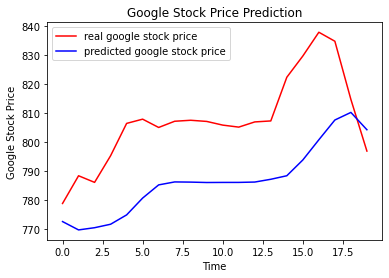

In [64]:
plt.plot(real_stock_price, color="red", label='real google stock price')
plt.plot(predicted_stock_price, color="blue", label="predicted google stock price")
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

## Self Organising Map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("datasets_CSV/P16-Self-Organizing-Maps/Self_Organizing_Maps/Credit_Card_Applications.csv")

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
X, y

(array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
         1.0000000e+02, 1.2130000e+03],
        [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
         1.6000000e+02, 1.0000000e+00],
        [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
         2.8000000e+02, 1.0000000e+00],
        ...,
        [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
         1.0000000e+02, 1.0000000e+00],
        [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
         1.2000000e+02, 1.2000000e+01],
        [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
         5.6000000e+02, 1.0000000e+00]]),
 array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
     

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [7]:
from minisom import MiniSom

In [8]:
som = MiniSom(x=10, y = 10, input_len = 15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration=100)

In [9]:
from pylab import bone, pcolor, colorbar, show, plot

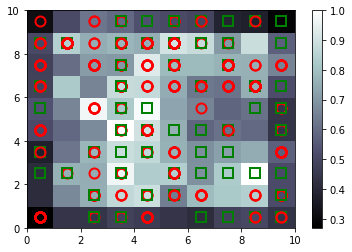

In [16]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor='None', markersize=10,
         markeredgewidth = 2)
show()

In [15]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(5,
              8): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
                     0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
                     0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
                     0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.59371959, 1.        , 0.06766917, 0.00589286, 0.5       ,
                     0.07692308, 0.375     , 0.00877193, 0.        , 0.        ,
                     0.        , 1.        , 0.        , 0.14      , 0.        ]), array([0.57477506, 1. 

In [18]:
frauds = np.concatenate((mappings[(5, 2)], mappings[(2, 0)]), axis=0)
frauds

array([[3.29777479e-01, 0.00000000e+00, 1.61654135e-01, 6.25000000e-02,
        0.00000000e+00, 5.38461538e-01, 3.75000000e-01, 5.78947368e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 6.60000000e-02, 0.00000000e+00],
       [6.64208001e-01, 0.00000000e+00, 2.36842105e-01, 7.14285714e-02,
        0.00000000e+00, 6.92307692e-01, 8.75000000e-01, 7.01754386e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 1.28000000e-01, 1.70000000e-04],
       [3.96069339e-02, 0.00000000e+00, 1.65413534e-01, 4.88035714e-01,
        5.00000000e-01, 7.69230769e-01, 8.75000000e-01, 5.26315789e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 1.40000000e-01, 1.00000000e-05],
       [3.15297783e-01, 0.00000000e+00, 6.64661654e-02, 3.57142857e-01,
        0.00000000e+00, 7.69230769e-01, 8.75000000e-01, 5.78947368e-03,
        0.00000000e+00, 0.00000000e+0

In [19]:
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5648069e+07, 0.0000000e+00, 2.4500000e+01, 1.7500000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.3200000e+02, 1.0000000e+00],
       [1.5731586e+07, 0.0000000e+00, 2.9500000e+01, 2.0000000e+00,
        1.0000000e+00, 1.0000000e+01, 8.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.5600000e+02, 1.8000000e+01],
       [1.5575605e+07, 0.0000000e+00, 2.4750000e+01, 1.3665000e+01,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 1.5000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 2.0000000e+00],
       [1.5644453e+07, 0.0000000e+00, 1.8170000e+01, 1.0000000e+01,
        1.0000000e+00, 1.1000000e+01, 8.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [20]:
customers = dataset.iloc[:, 1:].values

In [21]:
is_fraud = np.zeros(len(dataset))

In [22]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [24]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
from keras.models import Sequential
from keras.layers import Dense 

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [30]:
classifier = Sequential()
classifier.add(Dense(units=2, kernel_initializer="uniform", activation="relu", input_dim=15))
classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [31]:
classifier.fit(customers, is_fraud, batch_size=1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 2s 2ms/step - loss: 0.4659 - accuracy: 0.9681
Epoch 2/2
690/690 [==============================] - 2s 3ms/step - loss: 0.1800 - accuracy: 0.9681


In [32]:
y_pred = classifier.predict(customers)

In [33]:
y_pred

array([[0.04596388],
       [0.09876472],
       [0.06431904],
       [0.10266092],
       [0.11582276],
       [0.07830495],
       [0.07598031],
       [0.07398239],
       [0.09045371],
       [0.06627381],
       [0.05532625],
       [0.06718859],
       [0.06552362],
       [0.05473372],
       [0.04376155],
       [0.07657674],
       [0.04552117],
       [0.08671576],
       [0.06311944],
       [0.09583357],
       [0.08247581],
       [0.04845157],
       [0.06166005],
       [0.05914554],
       [0.09210232],
       [0.04897925],
       [0.05984002],
       [0.05743533],
       [0.09352812],
       [0.08225968],
       [0.04226297],
       [0.09449869],
       [0.07266876],
       [0.05959052],
       [0.06578353],
       [0.19314331],
       [0.06882021],
       [0.06795165],
       [0.06015995],
       [0.06777057],
       [0.05722687],
       [0.05041206],
       [0.06886241],
       [0.04007673],
       [0.12944636],
       [0.04595512],
       [0.10246983],
       [0.065

In [35]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)

In [37]:
y_pred = y_pred[y_pred[:, 1].argsort()]

In [38]:
y_pred

array([[1.57055060e+07, 2.26147175e-02],
       [1.55830670e+07, 2.36999989e-02],
       [1.56688300e+07, 2.37577558e-02],
       ...,
       [1.55941330e+07, 2.16693938e-01],
       [1.56901690e+07, 2.17866689e-01],
       [1.57257760e+07, 2.26588130e-01]])

##  Boltzmann machine

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

In [67]:
movies = pd.read_csv("datasets_CSV/P16-Boltzmann-Machines/Boltzmann_Machines/ml-1m/movies.dat", sep="::", header=None, engine="python", encoding='latin-1')

In [68]:
movies

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [69]:
users = pd.read_csv("datasets_CSV/P16-Boltzmann-Machines/Boltzmann_Machines/ml-1m/users.dat", sep="::", header=None, engine="python", encoding='latin-1')

In [70]:
users

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [71]:
ratings = pd.read_csv("datasets_CSV/P16-Boltzmann-Machines/Boltzmann_Machines/ml-1m/ratings.dat", sep="::", header=None, engine="python", encoding='latin-1')

In [72]:
ratings

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [73]:
training_set = pd.read_csv("datasets_CSV/P16-Boltzmann-Machines/Boltzmann_Machines/ml-100k/u1.base", delimiter="\t", header=None)

In [74]:
training_set

,0,1,2,3
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


In [75]:
training_set = np.array(training_set, dtype="int")

In [76]:
training_set

array([[        1,         1,         5, 874965758],
       [        1,         2,         3, 876893171],
       [        1,         3,         4, 878542960],
       ...,
       [      943,      1188,         3, 888640250],
       [      943,      1228,         3, 888640275],
       [      943,      1330,         3, 888692465]])

In [77]:
test_set = pd.read_csv("datasets_CSV/P16-Boltzmann-Machines/Boltzmann_Machines/ml-100k/u1.test", delimiter="\t", header=None)
test_set = np.array(test_set, dtype="int")
test_set

array([[        1,         6,         5, 887431973],
       [        1,        10,         3, 875693118],
       [        1,        12,         5, 878542960],
       ...,
       [      459,       934,         3, 879563639],
       [      460,        10,         3, 882912371],
       [      462,       682,         5, 886365231]])

In [78]:
nb_users = int(max(max(training_set[:, 0]), max(test_set[:, 0])))
nb_movies = int(max(max(training_set[:, 1]), max(test_set[:, 1])))

In [79]:
def convert(data):
    new_data = []
    for id_users in range(1, nb_users + 1):
        id_movies = data[:, 1][data[:, 0] == id_users]
        id_ratings = data[:, 2][data[:, 0] == id_users]
        ratings = np.zeros(nb_movies)
        ratings[id_movies - 1] = id_ratings
        new_data.append(list(ratings))
    return new_data
training_set = convert(training_set)
test_set = convert(test_set)

In [80]:
len(training_set[0])

1682

In [81]:
len(test_set[0])

1682

In [82]:
training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

In [83]:
training_set[training_set == 0] = -1
training_set[training_set == 1] = 0
training_set[training_set == 2] = 0
training_set[training_set == 3] = 1
training_set[training_set == 4] = 1
training_set[training_set == 5] = 1
test_set[test_set == 0] = -1
test_set[test_set == 1] = 0
test_set[test_set == 2] = 0
test_set[test_set == 3] = 1
test_set[test_set == 4] = 1
test_set[test_set == 5] = 1

In [87]:
class RBM():
    def __init__(self, nv, nh):
        self.W = torch.randn(nh, nv)
        self.a = torch.randn(1, nh)
        self.b = torch.randn(1, nv)
        
    def sample_h(self, x):
        wx = torch.mm(x, self.W.t())
        activation = wx + self.a.expand_as(wx)
        p_h_given_v = torch.sigmoid(activation)
        return p_h_given_v, torch.bernoulli(p_h_given_v)
    
    def sample_v(self, y):
        wy = torch.mm(y, self.W)
        activation = wy + self.b.expand_as(wy)
        p_v_given_h = torch.sigmoid(activation)
        return p_v_given_h, torch.bernoulli(p_v_given_h)
    
    def train(self, v0, bk, ph0, phk):
        self.W += torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)
        self.b += torch.sum((v0 - vk), 0)
        self.a += torch.sum((ph0 - phk), 0)

In [88]:
nv = len(training_set[0])
nh = 100
batch_size = 100
rbm = RBM(nv, nh)

In [91]:
nb_epochs = 10
for epochs in range(1, nb_epochs + 1):
    train_loss = 0
    s = 0.
    for id_user in range(0, nb_users - batch_size, batch_size):
        vk = training_set[id_user:id_user + batch_size]
        v0 = training_set[id_user:id_user + batch_size]
        ph0, _ = rbm.sample_h(v0)
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            vk[v0<0] = v0[v0 < 0]
        phk, _ = rbm.sample_h(vk)
        rbm.train(v0, vk, ph0, phk)
        train_loss += torch.mean(torch.abs(v0[v0>=0] - vk[v0>=0]))
        s += 1.
    print("epoch: " + str(epochs) + " " + "loss: " + str(train_loss/s))

RuntimeError: The size of tensor a (1682) must match the size of tensor b (100) at non-singleton dimension 1

# AutoEncoder

In [92]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

In [94]:
movies = pd.read_csv("datasets_CSV/P16-AutoEncoders/AutoEncoders/ml-1m/ml-1m/movies.dat", sep="::", header=None, engine='python', encoding="latin-1")

In [95]:
movies

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [96]:
users = pd.read_csv("datasets_CSV/P16-AutoEncoders/AutoEncoders/ml-1m/ml-1m/users.dat", sep="::", header=None, engine='python', encoding="latin-1")

In [98]:
users

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [99]:
ratings = pd.read_csv("datasets_CSV/P16-AutoEncoders/AutoEncoders/ml-1m/ml-1m/ratings.dat", sep="::", header=None, engine='python', encoding="latin-1")

In [100]:
ratings

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [103]:
training_set = pd.read_csv("datasets_CSV/P16-AutoEncoders/AutoEncoders/ml-100k/ml-100k/u1.base", delimiter='\t')
training_set

,1,1.1,5,874965758
0,1,2,3,876893171
1,1,3,4,878542960
2,1,4,3,876893119
3,1,5,3,889751712
4,1,7,4,875071561
...,...,...,...,...
79994,943,1067,2,875501756
79995,943,1074,4,888640250
79996,943,1188,3,888640250
79997,943,1228,3,888640275


In [104]:
training_set = np.array(training_set, dtype=int)
training_set

array([[        1,         2,         3, 876893171],
       [        1,         3,         4, 878542960],
       [        1,         4,         3, 876893119],
       ...,
       [      943,      1188,         3, 888640250],
       [      943,      1228,         3, 888640275],
       [      943,      1330,         3, 888692465]])

In [105]:
test_set = pd.read_csv("datasets_CSV/P16-AutoEncoders/AutoEncoders/ml-100k/ml-100k/u1.test", delimiter='\t')
test_set

,1,6,5,887431973
0,1,10,3,875693118
1,1,12,5,878542960
2,1,14,5,874965706
3,1,17,3,875073198
4,1,20,4,887431883
...,...,...,...,...
19994,458,648,4,886395899
19995,458,1101,4,886397931
19996,459,934,3,879563639
19997,460,10,3,882912371


In [106]:
test_set = np.array(test_set, dtype=int)
test_set

array([[        1,        10,         3, 875693118],
       [        1,        12,         5, 878542960],
       [        1,        14,         5, 874965706],
       ...,
       [      459,       934,         3, 879563639],
       [      460,        10,         3, 882912371],
       [      462,       682,         5, 886365231]])

In [108]:
nb_users = int(max(max(training_set[:, 0]), max(test_set[:, 0])))
nb_movies = int(max(max(training_set[:, 1]), max(test_set[:, 1])))
nb_users, nb_movies

(943, 1682)

In [110]:
def convert(data):
    new_data = []
    for id_users in range(1, nb_users + 1):
        id_movies = data[:, 1][data[:, 0] == id_users]
        id_ratings = data[:, 2][data[:, 0] == id_users]
        ratings = np.zeros(nb_movies)
        ratings[id_movies - 1] = id_ratings
        new_data.append(list(ratings))
    return new_data
training_set = convert(training_set)
test_set = convert(test_set)

In [112]:
len(training_set)

943

In [113]:
len(training_set[0])

1682

In [114]:
len(test_set)

943

In [115]:
len(test_set[0])

1682

In [116]:
training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

In [118]:
class SAE(nn.Module):
    def __init__(self):
        super(SAE, self).__init__()
        self.fc1 = nn.Linear(nb_movies, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 20)
        self.fc4 = nn.Linear(nb_movies, 20)
        self.activation = nn.Sigmoid()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x
sae = SAE()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(sae.parameters(), lr = 0.01, weight_decay=0.5)

In [119]:
nb_epoch = 200
for epoch in range(1, nb_epoch + 1):
    train_loss = 0
    s = 0.
    for id_user in range(nb_users):
        inputs = Variable(training_set[id_user]).unsqueeze(0)
        target = inputs.clone()
        if torch.sum(target.data > 0) > 0:
            output = sae(inputs)
            target.require_grad = False
            output[target == 0] = 0
            loss = criterion(output, target)
            mean_corrector = nb_movies / float(torch.sum(target.data > 0) + 1e-10)
            loss.backward()
            train_loss += np.sqrt(loss.data[0] * mean_corrector)
            s += 1.
            optimizer.step()
    print("epoch: " + str(epoch) + " loss: " + str(train_loss/s))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x20 and 1682x20)

In [1]:
import os
import tensorflow as tf
import cProfile

In [2]:
tf.executing_eagerly()

True

In [3]:
x = [[2]]
m = tf.matmul(x, x)
print("Hello, {}".format(m))

Hello, [[4]]


In [5]:
X = [[1, 2]]
y = [[1], [2]]
print(tf.matmul(X, y))

tf.Tensor([[5]], shape=(1, 1), dtype=int32)


In [6]:
a = tf.constant([[1, 2], [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [7]:
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [8]:
print(a*b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [9]:
import numpy as np
c = np.multiply(a, b)
print(c)

[[ 2  6]
 [12 20]]


In [10]:
print(a.numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>>


In [11]:
def fizzbuzz(max_num):
    counter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    for num in range(1, max_num.numpy() + 1):
        num = tf.constant(num)
        if int(num % 3) == 0 and int(num % 5) == 0:
            print("GizzBuzz")
        elif int(num % 3) == 0:
            print("fizz")
        elif int(num % 5) == 0:
            print("Buzz")
        else:
            print(num.numpy())
        counter += 1

In [12]:
fizzbuzz(15)

1
2
fizz
4
Buzz
fizz
7
8
fizz
Buzz
11
fizz
13
14
GizzBuzz


In [15]:
a = tf.constant(5)
print(int(a%5))

0


In [16]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = w * w
grad = tape.gradient(loss, w)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [21]:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()
dataset = tf.data.Dataset.from_tensor_slices((tf.cast(mnist_images[..., tf.newaxis] / 255, tf.float32), tf.cast(mnist_labels, tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [22]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, [3, 3], activation='relu', input_shape=(None, None, 1)),
    tf.keras.layers.Conv2D(16, [3, 3], activation="relu"),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])

In [24]:
for images, labels in dataset.take(1):
    print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[ 0.02825658 -0.01990466 -0.04348862  0.01477436 -0.01347964  0.06450555
   0.0234409   0.01007115  0.01622709 -0.04012824]]


In [25]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_history = []

In [32]:
def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True)
        tf.debugging.assert_equal(logits.shape, (32, 10))
        loss_value = loss_object(labels, logits)
    loss_history.append(loss_value.numpy().mean())
    grads = tape.gradient(loss_value, mnist_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

In [33]:
def train(epochs):
    for epoch in range(epochs):
        for (batch, (images, labels)) in enumerate(dataset):
            train_step(images, labels)
        print('Epoch {} finished'.format(epoch))

In [34]:
train(epochs=3)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


Text(0, 0.5, 'Loss [entropy]')

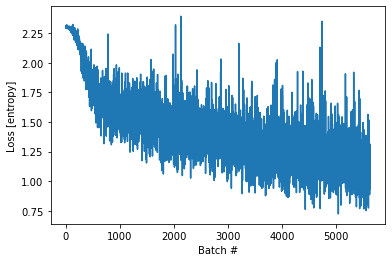

In [35]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

In [45]:
model.save_weights('weights')
status = model.load_weights('weights')

In [46]:
x = tf.Variable(10)
checkpoint = tf.train.Checkpoint(x=x)

In [48]:
x.assign(2)
checkpoint_path = './ckpt/'
checkpoint.save(checkpoint_path)

'./ckpt/-1'

In [49]:
x.assign(11)
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_path))
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>


In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, [3, 3], activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
checkpoint_dir = 'path/to/model_dir'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
root = tf.train.Checkpoint(optimizer=optimizer, model=model)
root.save(checkpoint_prefix)
root.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [55]:
m = tf.keras.metrics.Mean('loss')
m(0)
m(5)
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [56]:
m([8, 9])
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=5.5>

In [57]:
logdir = "./tb/"
writer = tf.summary.create_file_writer(logdir)
steps = 100
with writer.as_default():
    for i in range(steps):
        step = i + 1
        loss = 1 - 0.001 * step
        if step % 100 == 0:
            tf.summary.scalar('loss', loss, step=step)

In [58]:
def line_search_step(fn, init_x, rate=0.1):
    with tf.GradientTape() as tape:
        tape.watch(init_x)
        value = fn(init_x)
    grad = tape.gradient(value, init_x)
    grad_norm = tf.reduce_sum(grad*grad)
    while value > init_value - rate * grad_norm:
        x = init_x - rate * grad
        value = fn(x)
        rate /= 2.0
    return x, value

In [59]:
@tf.custom_gradient
def clip_gradient_by_norm(x, norm):
    y = tf.identity(x)
    def grad_fn(dresult):
        return [tf.clip_by_norm(dresult, norm), None]
    return y, grad_fn

In [60]:
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)
